# Convolutional Neural Networks

## Working with images

**Q.** How would you classify between images of dogs and cats?

1. **Predict per pixel** and average per pixel after
2. **Extract features** (e.g. how furry?) from the image and pass to a model
3. Other ideas?

Can you see downsides to these approaches?

The problem we are trying to tackle with convolutional neural networks is the classification of images into different categories. 

For instance, imagine we have two classes of photos: one is the class of photos containing dogs, and the other is the class of photos containing cats. We would like to build a classifier that can take as an input a new photograph and tell us which "class" the image belongs to.

There are a few ways we could go about this:
- we could predict on a per-pixel basis and take the average of all the predictions 
- we could try and write code to extract features (like reasoning about how furry the animal is)
- can you think of any other approaches?

More importantly, can you see the downsides to these approaches?

Can you imagine trying to write code to robustly quantify the amount of furriness in a photo? As the number of classes you have grows, the code is going to get extremely complex extremely quickly. This is where neural networks (and in particular, convolutional neural networks), come in. They're going to **learn** to extract those features all by themselves. 

## Using Neural Networks with Images

- if we want to use a fully-connected layer, we need to flatten the image into a vector

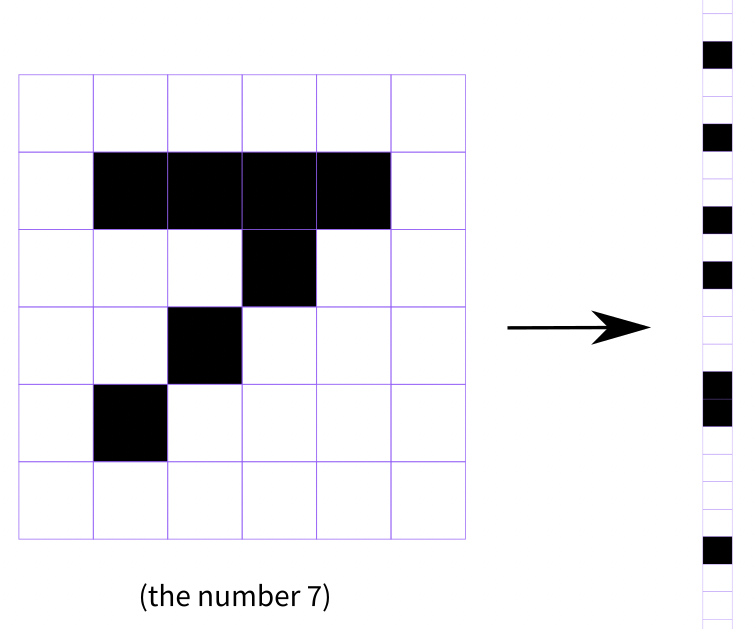



We've already seen fully connected neural networks. We could plug images directly into them by flattening the 2D grid out into one long vector, as you can see in this picture. 

The problem with this really is that when we flatten out into a vector we're losing a lot of the spatial information and relationships between the features. In particular, as humans we might look at the vector on the left and find it much harder to classify than the (admittedly still hard-to-classify) picture on the left.

Really we'd like to give neural networks the power to use this spatial information to make decisions. 

## Convolution: in pictures

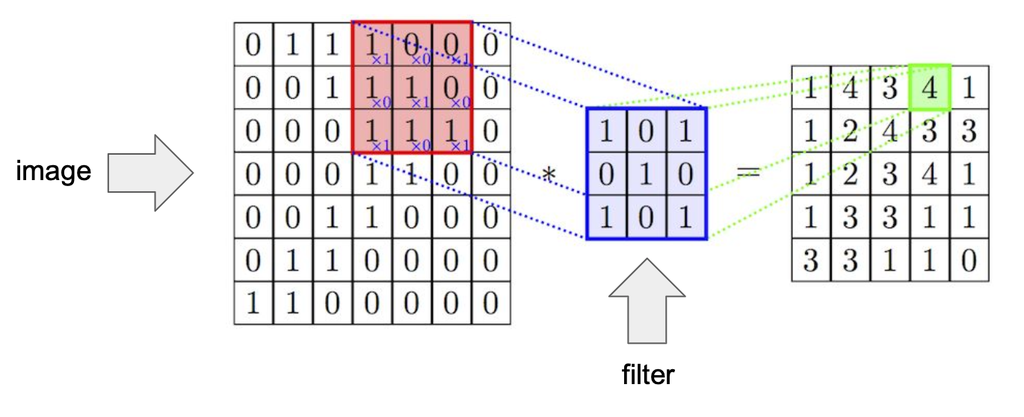

- output on the **right** is called a **feature map**

In order to encode spatial information, we typically use an operation called *convolution*. 

Don't worry if it doesn't make sense straight away, it's not a particularly obvious operation to grasp, so we're going to go through it a couple of times.

In the convolution operation we have what's called a "filter" or "kernel" of individual weights. To produce a single value of the output, we're going to take the inner product of the filter and an associated "region" in the input. The inner product, sometimes called the Frobenius inner product, involves summing the products of all the values in the two matrices. 

We "slide" the filter over every possible location in the input in order to generate a single value for each of the positions, which we output as a "feature map". By learning the weights that go in the filter, we're hoping to learn a way to extract features from the image.




## Convolution: in maths

The output point $(i,j)$ of the convolution between input image $I$ and convolutional kernel $K$ is given by:

$$
\sum_{h}^{H} \sum_{w}^{W} I(i+h,j+w) K(i)(j)
$$

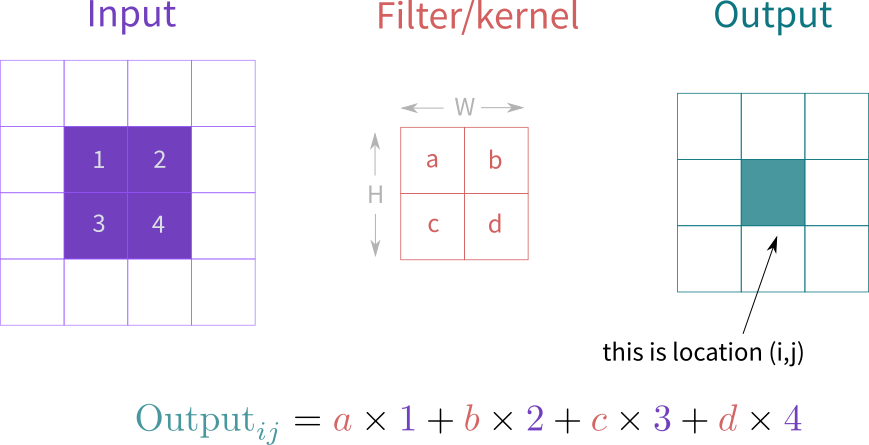

If this doesn't make sense straight away, don't worry. 

Here is a more mathematical view of the same thing: we have an input square on the left.
We start in the top left hand corner and slide our way through the image. In the photo, we're seeing the middle location. 

At each location, we inner product the input with the filter to produce a single value in the output.

## Convolution: in code

The **single output point $(i,j)$** of the convolution between input image $I$ and convolutional kernel $K$ is given by:

```python
for h in range(H):
    for w in range(W):
        O[i,j] += I[i+h, j+w] * K[i,j]
```

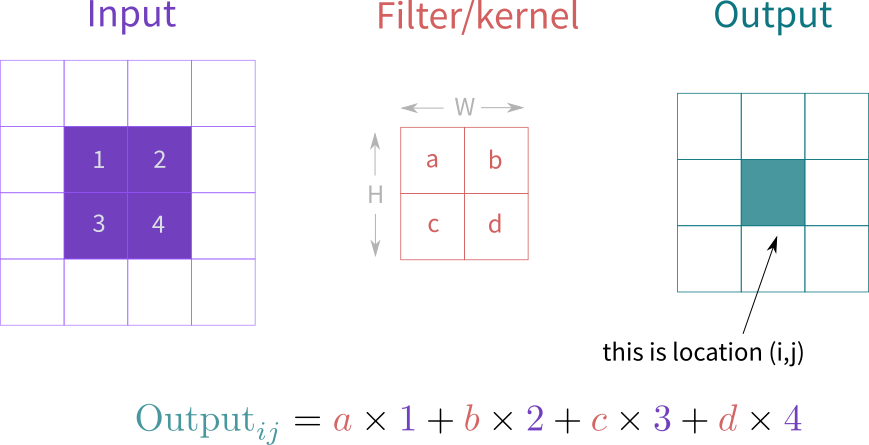

You can think of the output of just this one individual region in code as being this double for loop: over the height and width of the filter. 

Note that this would have to be repeated for every location in the image. 

## Recap: convolution 3 ways

Maths:
$$
\sum_{h}^{H} \sum_{w}^{W} I(i+h,j+w) K(i)(j)
$$

Code:
```python
for h in range(H):
    for w in range(W):
        O[i,j] += I[i+h, j+w] * K[i,j]
```

Picture:

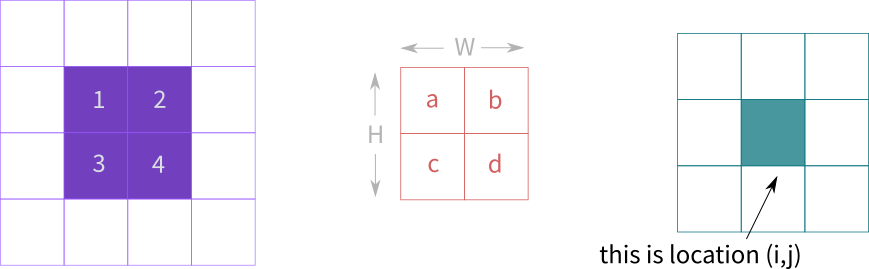

So to recap, here are three different pictures of the same thing: the maths, the code, the picture. Take a minute to internally try to relate them to one another. 

Remember that this operation is going to be applied at every single one of the locations in the input. Can you see why our 4 by 4 input produces a 3 by 3 output with our 2 by 2 filter? 

## Convolutions: benefits 

- **local connectivity** - pixels near each other are assumed to be highly correlated
- **compositionality** - having multiple kernels composes a list of features 
- **translation/shift invariance** - by locally extracting features, it doesn't matter where they are in the image

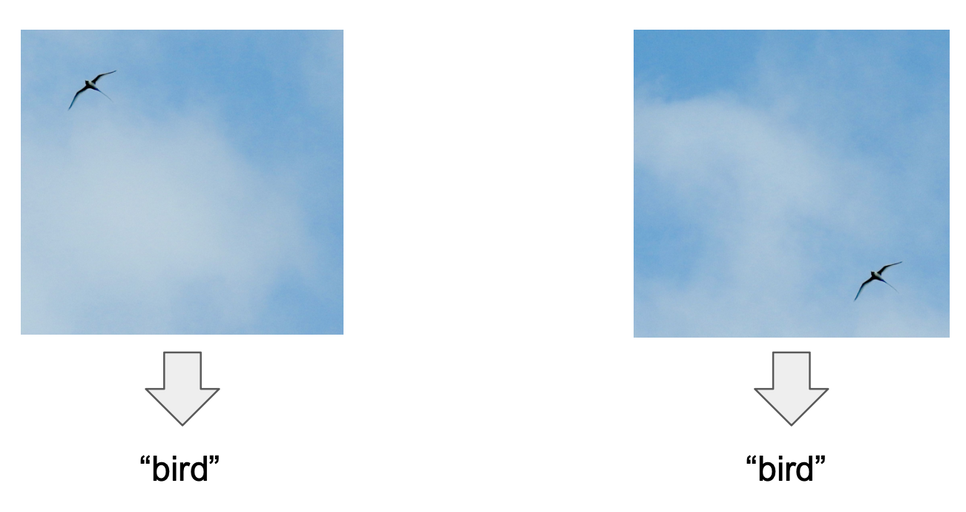

There are various bits of functionality we are hoping to achieve with the convolution operation. 

The first is local connectivity: pixels next to one another are being "summed up", meaning that the relation between two nearby pixels is going to be expressed in the output value. 

The second is compositionality: this individual filter is going to extract one set of features. If we have lots of filters, they can each extract their own features and we will end up with a **hierarchy** of hopefully composable features. 

The final, and possibly most important feature is translation invariance: we are multiplying by the same weights at every location in the image. This means that if the same feature appeared twice in an image and different locations, the output value of the convolution will be identical for those two locations.

## Multiple **input** channel convolution

- what if we have multiple input channels (e.g. RGB channels?)
- if we have 3 **input channels**, our kernel/ filter also needs 3 **input channels**
- we still only produce a **single output** channel

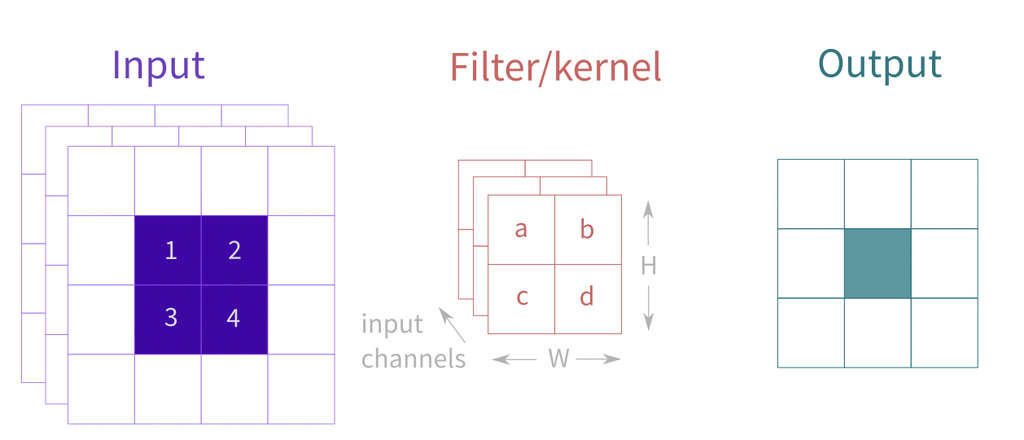

It's most often the case that we have multiple channels. For instance, the classic example here is that we tend to store our images in Red-Green-Blue (RGB) format. That is to say that images are stored in the computer as three 2D matrices: one for the "red" channel, one for "green, one for "blue". 

In order to adapt the convolution to deal with this all we need to do is make our filter multi-dimensional such that it has the same number of channels as the input. We're still summing up products, so we will still only be getting a single value per input location. 

## Multiple **output** channel convolution

- several convolutional kernels applied to the same input 
- each one produces a single output channel

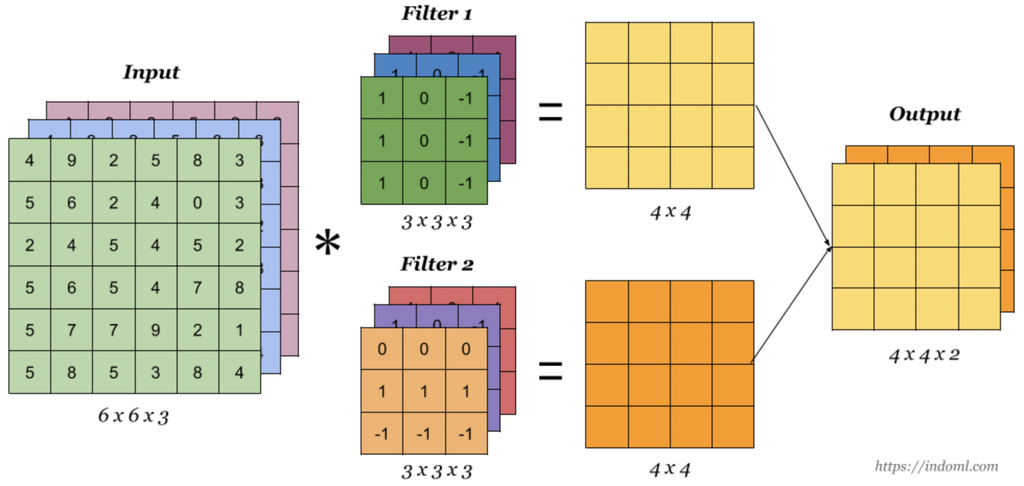

In convolutional neural networks we're going to add yet another dimension to this: we're going to have multiple filters. Each filter will produce a single output channel, meaning that the output of this will be a collection of 2D feature maps. If we have N filters, we will have N feature maps in the output. 

This can then be fed into another convolution, as long as the next convolution has the same number of input channels as the number of output channels we have just produced.

## Multiple output channel convolution 

In code/ maths we are just adding new dimensions to aggregate over:

Maths:
$$
\sum_{ci}^{Ci}\sum_{co}^{Co}\sum_{h}^{H} \sum_{w}^{W} I(ci, i+h,j+w) K(ci,co,i,j)
$$

Code:
```python
for ci in range(Ci):           # input channels
    for co in range(Co)        # output channels
        for h in range(H):     # height
            for w in range(W): # width
                O[co,i,j] += I[ci, i+h, j+w] * K[ci, co, i,j]
```

- don't worry if this is now confusing! it's more important to understand the visual intuition

We can re-visit this in code and maths now: all we're doing is adding extra dimensions to sum over. 

In this case in particular we are adding one summation for the input channels, and one for the output channels or number of filters we want to use.

## Variations on convolution (I)

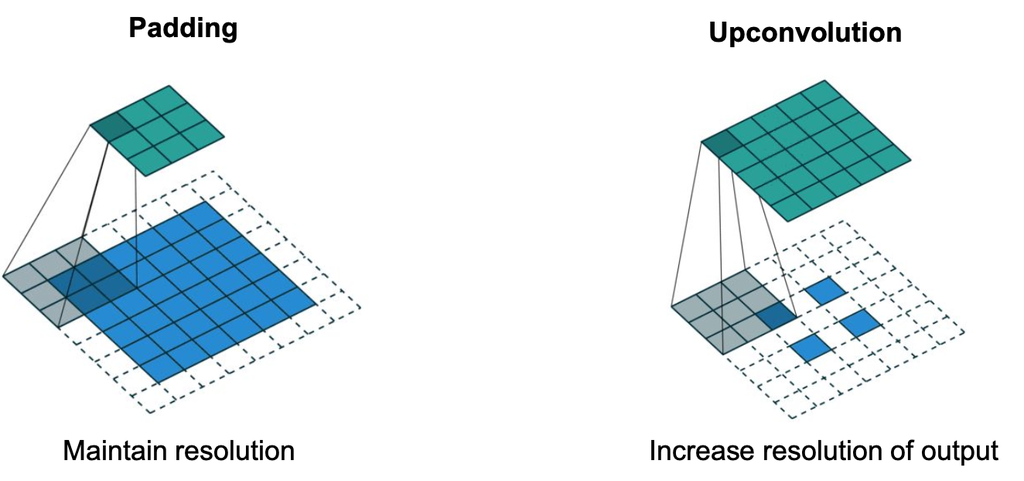

- upsampling also known as transposed convolution

There are various slight modifications of the convolution operation that we typically end up using in practice, each for various different reasons. 

We noticed earlier in the lecture that convolution could downsize the spatial dimensions of our image. One simple way to cope with this is to add a padding of zeroes around the image on the input, such that the resolution is maintained in the output. 

Alternatively, shown on the right, we can actually **increase** the resolution of the output using "upconvolution" or "transposed convolution". In this case we dilate the input and apply the convolutional kernel as usual. 

## Variations on convolution (II)

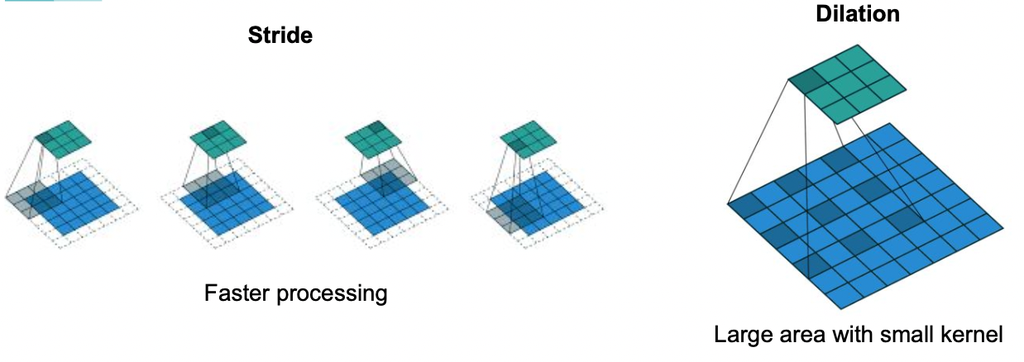
- plus [many more](https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md)!

Sometimes downsizing the spatial dimensions of the image is actually desirable. In this case we have two classic options:
- adding in a stride: here we just skip certain input locations
- adding in dilation: we spread out the receptive field of the filter to skip individual pixels 

## Pooling layers
- convolutions + pooling ~= translation invariance 
- reduce resolution (normally for efficiency)
- commonly `max` or `avg`

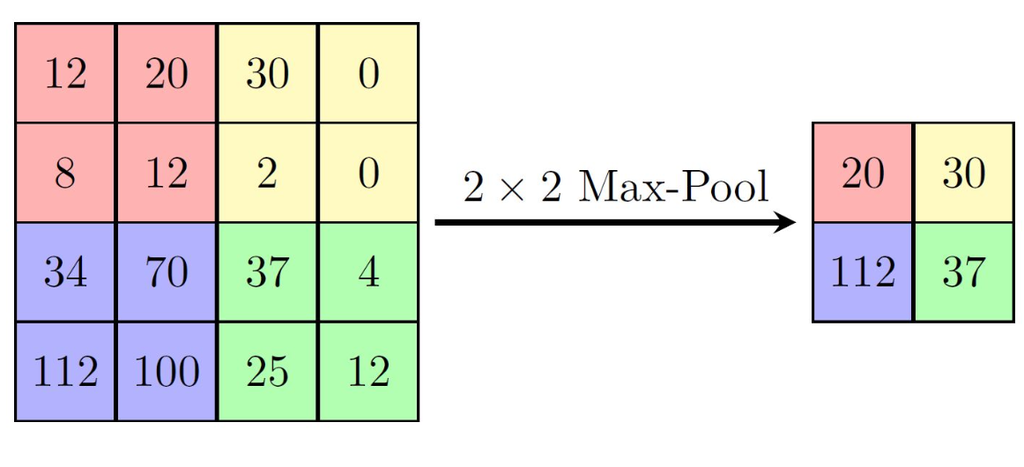
- will tell us whether or not this part of the image contains the feature we are looking for (e.g. does yellow region contain a circle?)

Another way we can do this is "pooling". All this involves is aggregating pixels in similar regions via some aggregation function. For example, here we just take every two-by-two region and take the maximum valued pixel to use as a representative. 

We're hoping that this is going to tell us things like "does this region of the image contain a specific feature?".


## Recap

A **convolutional layer**:
- we have an input composed of **input channels**
- we convolve with a set of $N$ **kernels/filters** ...
- ... which produces $N$ **output channels** 

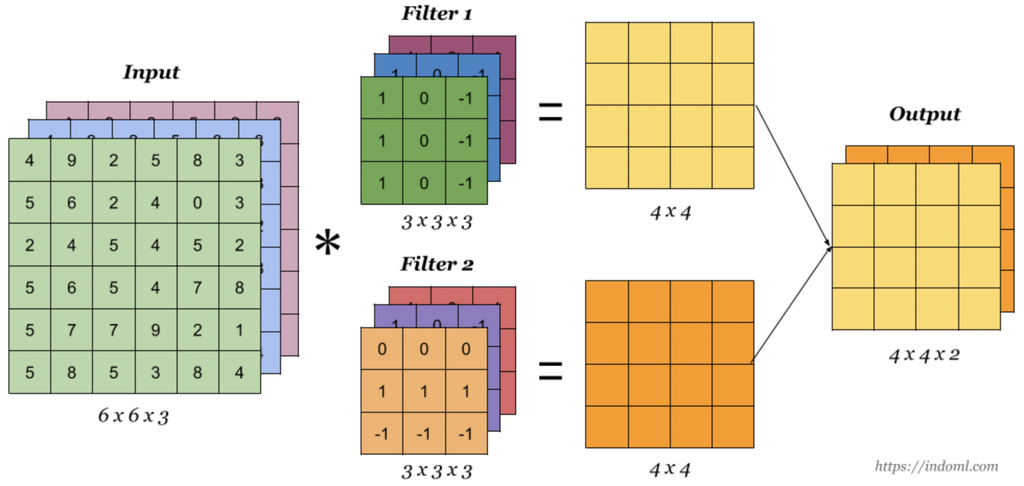

What we have seen so far actually turns out to be equivalent to a layer in a convolutional neural network.

So to recap: the "layer" is going to receive as input a volume with several input channels of specific spatial dimensions (height and width). 

The layer itself has a set of N filters, each of which produces a single output feature map, resulting in an ouput volume of N channels. 

This output volume is then considered to be the input volume to the next layer, and so on.


## Convolutional Neural Networks

- A sequence of **convolutional layers** (+ pooling) extracts a **feature map**.
- The final **feature map** is fed to classifier (fully-connected layer) to guess a **class**.

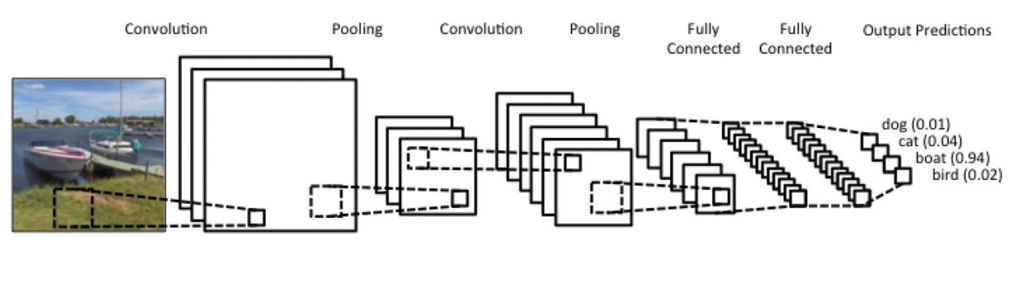

So to actually build a neural network from convolutions, what we do is interleave several convolution and pooling layers to extract a "feature map".

This "feature map" is then given to a classifer (usually a fully connected layer), which will guess a class for us.

## Convolutional Neural Nets explainer

- [This website](https://poloclub.github.io/cnn-explainer/) has a useful tool for visualising how CNNs make decisions

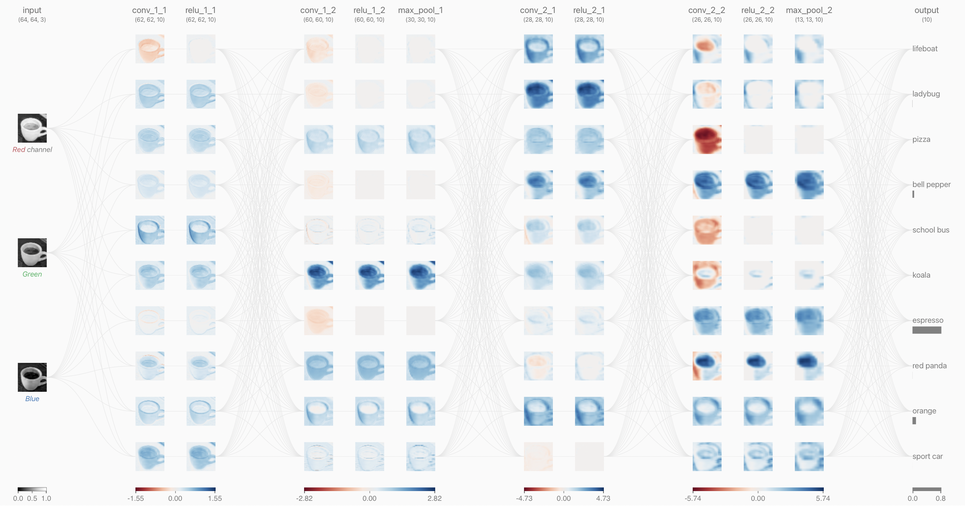

Here is a particularly useful website which I encourage you to take a look at and play with to build some intuition for how convolutional networks extract features and make decisions.

## Another example of feature extraction

- In [Circuits](https://distill.pub/2020/circuits/zoom-in/), they deconstruct a ConvNet and illustrate what it has learnt

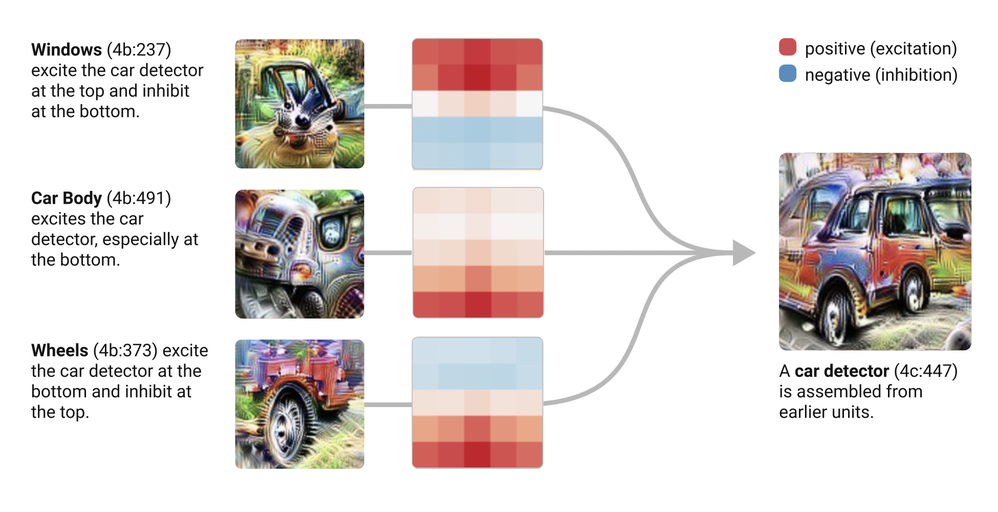

- illustrates **compositionality** of images, and importance of **local** feature extraction

One subfield of research within neural networks is interpreting the features they extract. This is a screenshot from some very recent work on deconstructing the various components of a feature extractor. In this picture we see a car being broken down into several "exemplar" inputs that would be composed in order to give an output prediction of "car".

The website has lots of examples of the kinds of filters we can detect, so I encourag you to take a look and have a read.

## Full ConvNet
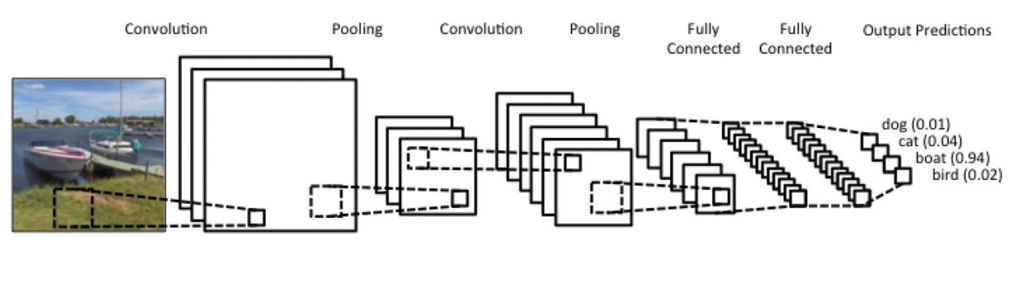

So another brief: what we're doing in convolutional networks is attempting to automate the process of "feature extraction". We do this via a series of convolutions (and pooling layers), which will give us some output volume at the end. 

## Batch normalization 

- normalizes the output of layer to have **mean zero** and **variance one** across a batch of inputs
- makes training easier since outputs are similarly distributed for different batches of inputs
- two (learned) parameters $\gamma$ and $\beta$:
$$
    y = \frac{x-E[x]}{\sqrt{Var[x]+\epsilon}} \times \gamma + \beta
$$

A very common pattern in data science is to *normalize* inputs. 

In this case, we're taking a layered approach to learning, and between layers we could observe drastic changes in the input distribution. A very popular trick in modern networks is to use a normalization layer between each of the convolutional layers essentially to the same effect. 

Overall it's an open research topic as to why this really works. However you can imagine intuitively that adding in normalization makes training easier because the batches will all be fairly similarly distributed. 

References:
Old work showing batchnorm doesn't reduce internal covariate shift:
- Santurkar, Shibani, et al. "How does batch normalization help optimization?." arXiv preprint arXiv:1805.11604 (2018). 

A blog post arguing it does:
- https://myrtle.ai/learn/how-to-train-your-resnet-7-batch-norm/

Recent work on removing batchnorm from convnets:
- Brock, Andrew, et al. "High-Performance Large-Scale Image Recognition Without Normalization." arXiv preprint arXiv:2102.06171 (2021).

## Batch normalization 

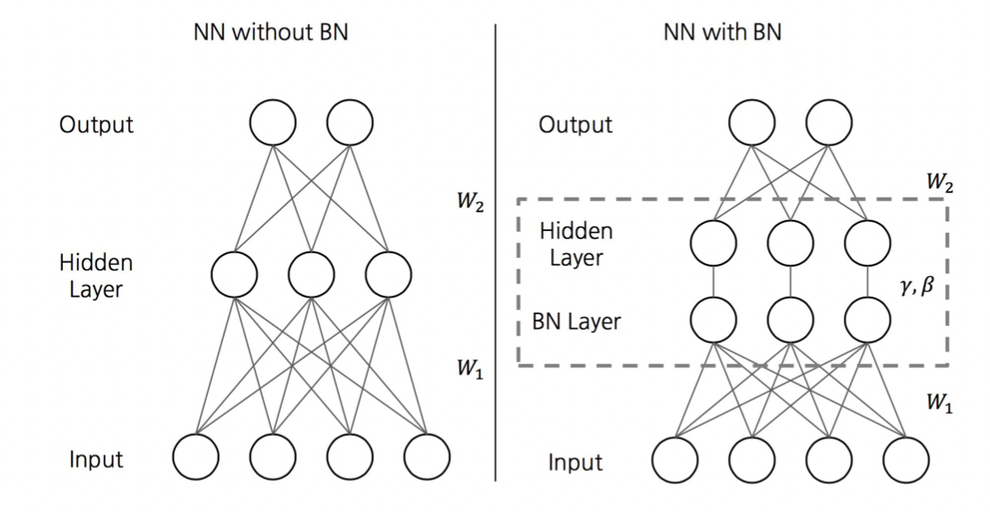

In general, applying batchnorm looks like this. On the left you can see a network without batch normalization, where the output from the first layer is passed through a hidden layer directly to an output layer. 

On the right you can see the addition of batch norm after the input layer. The output of this input layer is then normalized before being given to the hidden layer in the middle. 





### Activation Functions
- allows us to compute **nonlinear functions**
- **activates**/turns the channel on/off depending on a threshold

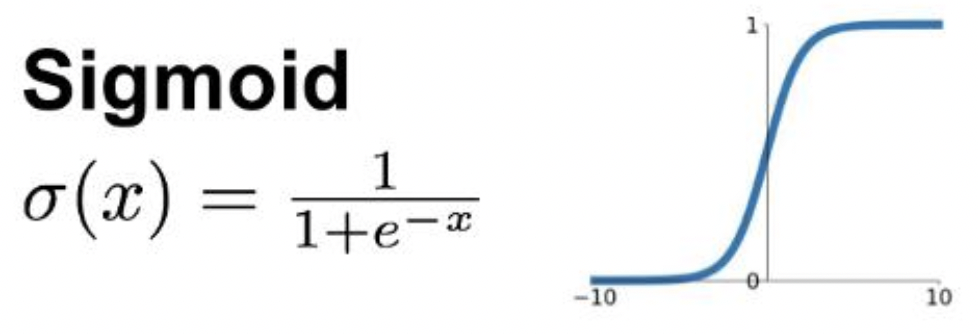 

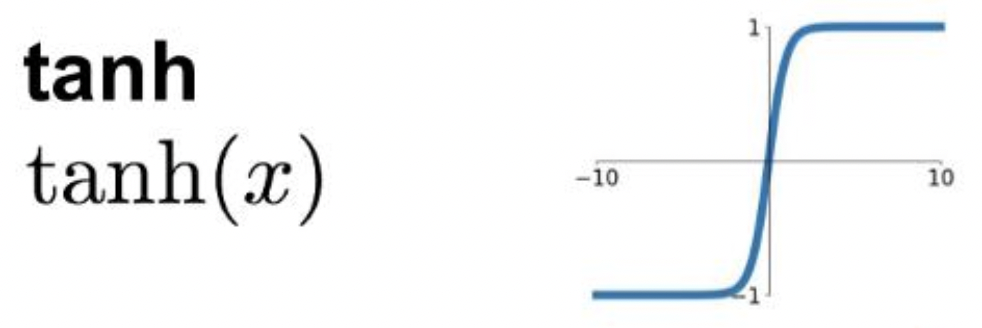

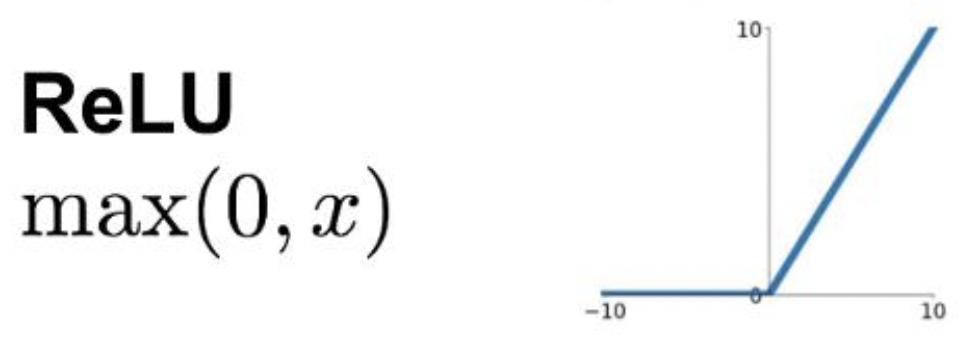 

There's one last ingredient that we need to build convolutional networks: activation functions. It turns out that all of the operations we've discussed so far are limited to describing linear or affine transformations. 

However, we'd really like our networks to be able to describe non-linear functions too. This is where activation functions come in: they push the output of the layer through a non-linear function to transform it in some specific way. For instance, ReLU (rectified linear unit), bottom right, zeroes out any negative outputs from the convolution. 

## Case Study: LeNet-5

**Stage 1**  
Conv 1 $\rightarrow$ 6 (kernel_size=5$\times$5)  
ReLU  
MaxPool (kernel_size=2$\times$2)  

**Stage 2**  
Conv 6 $\rightarrow$ 16 (kernel_size=5$\times$5)  
ReLU  
MaxPool (kernel_size=2$\times$2)  
  
**Stage 3**  
Flatten into vector of size 256    
Linear 256 $\rightarrow$ 120  
ReLU  
Linear 120 $\rightarrow$ 84  
ReLU  
Linear 84 $\rightarrow$ 10  


Here's a case study: LeNet-5. You can read this slide top-to-bottom as a sequence of layers.

First we have a convolution which takes 1 input feature map and translates it into 6 output feature maps with a filter/kernel size of 5 by 5. The output of this is pushed through a ReLU and a maxpool. 

Next another convolution takes us from 6 feature maps/ channels to 16. Again, this is followed by a ReLU and a maxpool. 


Finally, we flatten out the output of this into a vector and pass it through several fully connected layers to get a classification.


## Case Study: LeNet-5

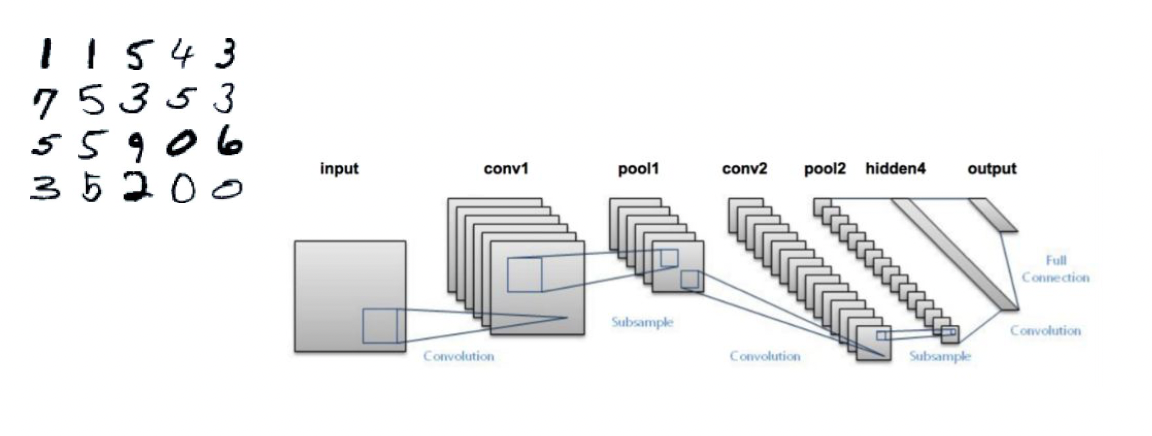

This network in particular was designed for handwritten digit classification (where we have 10 classes, the digits 0 to 9). 


Here is a picture of what this looks like.

## Case Study: VGG
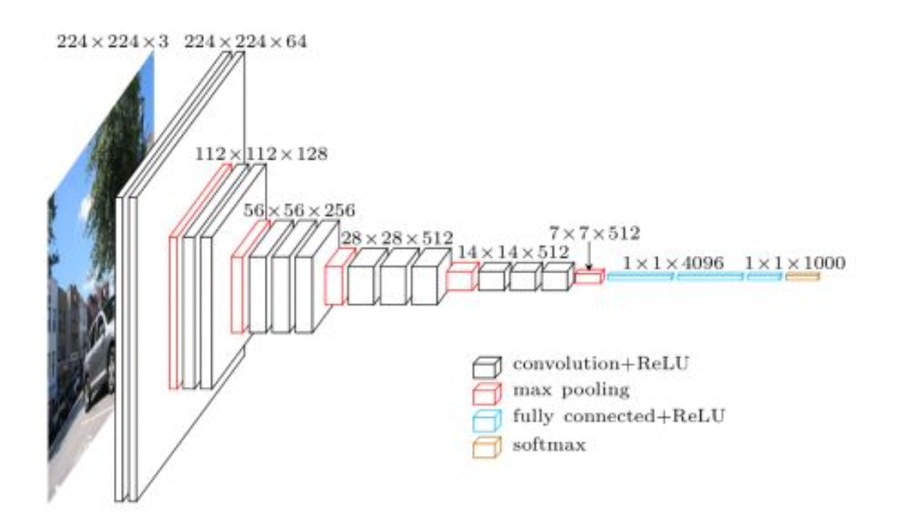

A more complex example of a convolutional network is VGG (VGG is the name of the research group that designed it). 

Here, large images are mapped through a series of convolutions and poolings into a fully connected layer, which can make classification decisions between 1000 classes. 